In [1]:
import pickle
import numpy as np
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE


Using TensorFlow backend.


In [2]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, roc_auc_score, roc_curve, auc

from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import xgboost as xgb
# to help kernel not die when running XG Boost 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
%matplotlib inline

/Users/ramavni/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# !pip install imblearn

In [4]:
with open('X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
    
with open('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [5]:
print(f'Still with asthma: {y_train.value_counts()[1]}')
print(f'Not with asthma: {y_train.value_counts()[2]}')

Still with asthma: 639
Not with asthma: 6511


In [6]:
X_train.columns

Index(['RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'INDFMPIR', 'MCQ010',
       'MCQ025', 'MCQ080', 'MCQ300B', 'DR1TTFAT', 'DR1TCHOL', 'DR1TATOC',
       'DR1TVB1', 'DR1TVB2', 'DR1TVD', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO'],
      dtype='object')

In [7]:
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)

In [8]:
# X_train.head()

## Smote

In [9]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'A': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label 'NA': {} \n".format(sum(y_train==2)))

smt = SMOTE(random_state=2)
X_train_res, y_train_res = smt.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'A': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label 'NA': {}".format(sum(y_train_res==2)))

Before OverSampling, counts of label 'A': 639
Before OverSampling, counts of label 'NA': 6511 

After OverSampling, the shape of X_train: (13022, 18)
After OverSampling, the shape of y_train: (13022,) 

After OverSampling, counts of label 'A': 6511
After OverSampling, counts of label 'NA': 6511


In [10]:
X_train_smoted = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_smoted = pd.DataFrame(y_train_res)

In [11]:
y_train_smoted[0].value_counts()

1.0    6511
2.0    6511
Name: 0, dtype: int64

In [12]:
# set(y_test)
y_test.size
X_test.shape
y_test.astype(int)

7133    1
4253    1
7740    1
6107    2
6728    2
1328    2
2955    2
2521    2
3341    2
7289    2
2627    2
3001    2
2446    2
4825    2
222     2
2150    2
5720    2
3065    2
2304    2
1162    2
95      1
3172    2
3666    1
2481    2
7875    2
5357    2
4129    2
4001    2
1315    2
592     2
       ..
7371    2
1840    2
3912    2
5478    2
4664    2
4580    2
6683    2
7529    1
5187    2
2275    2
1897    1
2166    2
7415    2
6994    2
4556    2
8390    2
8551    2
5689    2
4861    2
3898    2
8148    2
8011    2
1329    2
8266    2
1684    2
8614    1
6907    2
1777    2
3964    1
751     1
Name: MCQ035, Length: 1788, dtype: int64

## Initial Models
Trying a few baseline models.

### Scale features

In [13]:
from sklearn import preprocessing

x = X_train_smoted.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_scaled_smoted = pd.DataFrame(x_scaled, columns = X_train_smoted.columns)

x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test_scaled = pd.DataFrame(x_scaled, columns = X_train_smoted.columns)

In [14]:
X_train_scaled_smoted

,RIDAGEYR,DMDEDUC2,DMDHHSIZ,DMDFMSIZ,INDFMPIR,MCQ010,MCQ025,MCQ080,MCQ300B,DR1TTFAT,DR1TCHOL,DR1TATOC,DR1TVB1,DR1TVB2,DR1TVD,DR1TMAGN,DR1TCAFF,DR1TALCO
0,0.189873,0.250000,0.666667,0.666667,0.400000,1.0,0.000000,0.000000,1.000000,0.117041,0.133086,0.023591,0.201199,0.180411,0.089629,0.072277,0.000000,0.000000
1,0.101266,0.250000,0.500000,0.500000,0.046000,1.0,0.000000,1.000000,1.000000,0.076269,0.035040,0.012196,0.193166,0.132691,0.042254,0.050594,0.000442,0.000000
2,0.012658,0.250000,0.500000,0.500000,0.824000,1.0,0.000000,1.000000,0.000000,0.130999,0.033693,0.066857,0.106847,0.122776,0.069142,0.105834,0.000000,0.000000
3,1.000000,0.000000,0.166667,0.166667,0.174000,0.0,0.062500,1.000000,1.000000,0.082426,0.047170,0.020208,0.062731,0.081171,0.011524,0.041301,0.032450,0.000000
4,0.316456,0.375000,0.166667,0.000000,0.244000,0.0,0.050000,1.000000,0.000000,0.131500,0.063005,0.055551,0.087467,0.174852,0.003841,0.091895,0.060927,0.000000
5,0.329114,0.375000,0.500000,0.500000,0.248000,1.0,0.000000,1.000000,1.000000,0.103022,0.047170,0.053770,0.166773,0.094422,0.020487,0.154879,0.015894,0.000000
6,0.050633,0.250000,0.833333,0.833333,0.034000,1.0,0.000000,1.000000,0.000000,0.113070,0.092318,0.062940,0.138212,0.183469,0.081946,0.131647,0.000000,0.000000
7,0.202532,0.250000,0.666667,0.666667,0.453855,0.0,0.075000,1.000000,0.000000,0.163648,0.051213,0.132200,0.228356,0.159099,0.096031,0.136293,0.000442,0.000000
8,0.126582,0.250000,1.000000,1.000000,0.453855,1.0,0.000000,1.000000,1.000000,0.152953,0.091060,0.070745,0.189942,0.177613,0.063530,0.135790,0.020148,0.006957
9,0.075949,0.250000,0.833333,0.833333,0.234000,1.0,0.000000,1.000000,1.000000,0.067866,0.028302,0.057242,0.096009,0.065141,0.002561,0.109448,0.000883,0.000000


In [15]:
X_test_scaled

,RIDAGEYR,DMDEDUC2,DMDHHSIZ,DMDFMSIZ,INDFMPIR,MCQ010,MCQ025,MCQ080,MCQ300B,DR1TTFAT,DR1TCHOL,DR1TATOC,DR1TVB1,DR1TVB2,DR1TVD,DR1TMAGN,DR1TCAFF,DR1TALCO
0,0.354430,1.00,0.333333,0.333333,0.856000,0.0,0.1000,1.0,0.0,0.205214,0.133929,0.250100,0.196847,0.121703,0.011204,0.257576,0.000000,0.000000
1,0.063291,0.50,0.833333,0.833333,0.922000,0.0,0.0625,1.0,1.0,0.192498,0.114909,0.153782,0.132598,0.118528,0.069492,0.190611,0.052304,0.026872
2,0.354430,0.50,0.333333,0.333333,0.892000,0.0,0.1250,1.0,0.0,0.271074,0.106718,0.150259,0.342415,0.277045,0.113445,0.245614,0.104871,0.000000
3,0.151899,0.50,0.833333,0.833333,0.368000,1.0,0.0000,1.0,1.0,0.424828,0.011054,0.509167,0.181279,0.162137,0.078431,0.366029,0.009169,0.000000
4,0.367089,0.50,0.166667,0.000000,0.976000,1.0,0.0000,1.0,1.0,0.085631,0.076956,0.027501,0.072784,0.122982,0.060224,0.129984,0.001719,0.000000
5,0.000000,0.50,0.333333,0.333333,0.786000,1.0,0.0000,1.0,0.0,0.172107,0.049745,0.057194,0.126399,0.113765,0.110644,0.094896,0.000573,0.000000
6,0.329114,0.75,0.166667,0.166667,0.258000,0.0,0.1000,0.0,1.0,0.159290,0.089286,0.178956,0.063540,0.049314,0.015406,0.118022,0.000573,0.000000
7,0.227848,0.50,0.500000,0.500000,1.000000,1.0,0.0000,1.0,0.0,0.192498,0.114909,0.153782,0.132598,0.118528,0.069492,0.190611,0.052304,0.026872
8,0.544304,0.50,0.666667,0.666667,0.148000,1.0,0.0000,0.0,0.0,0.170444,0.088435,0.057393,0.079206,0.054561,0.063025,0.212121,0.054441,0.000000
9,0.151899,0.50,0.666667,0.666667,0.074000,1.0,0.0000,1.0,1.0,0.192498,0.114909,0.153782,0.132598,0.118528,0.069492,0.190611,0.052304,0.026872


In [52]:
# Set target values from {1,2} to {1,0}

y_train_smoted.replace(to_replace=2, value=0 , inplace = True)
y_test.replace(to_replace=2, value=0 , inplace = True)

y_train_smoted = y_train_smoted.astype(int)
y_test = y_test.astype(int)

print(y_train_smoted[0].value_counts())
print(y_test.value_counts())

1    6511
0    6511
Name: 0, dtype: int64
0    1637
1     151
Name: MCQ035, dtype: int64


### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1637
           1       0.66      0.57      0.61       151

    accuracy                           0.94      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.94      0.94      0.94      1788

0.9390380313199105


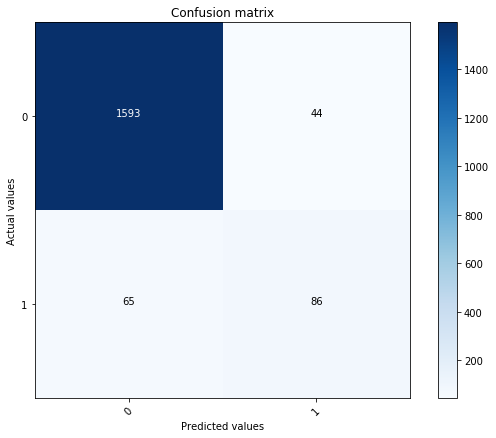

AUC (pred_proba):  0.9728242181020846


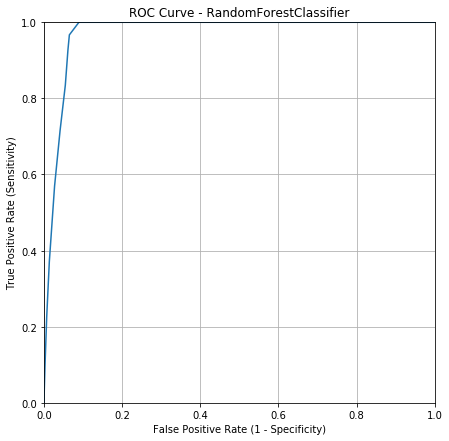

In [139]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = rf_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0, 1])

# testing
ROC_func(rf_clf, X_test_scaled, y_test)


plt.show()

Model Scores for:  

 ----> RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Train Accuracy score:  0.9984641376132698
Test Accuracy score:  0.9407158836689038 

Train F1 score:  0.9984664928691919
Test F1 score:  0.6558441558441558 

Testing Precision Score:  0.643312101910828
Testing Recall Score:  0.6688741721854304
Test AUC score:  0.8173326267158063 

Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1637
           1       0.64      0.67      0.66       151

    accur

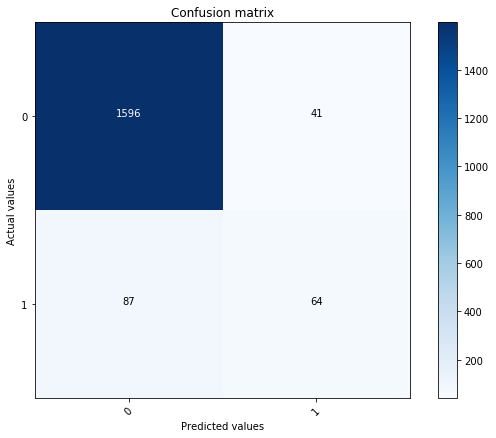

AUC (pred_proba):  0.9734209323305838


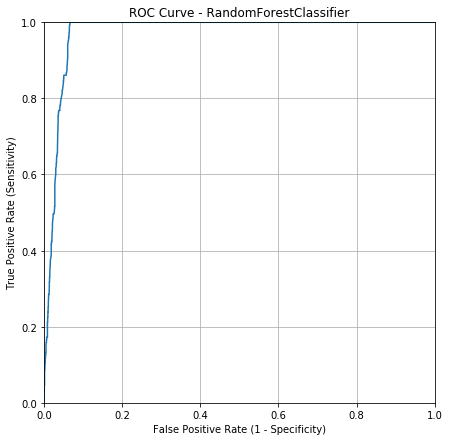

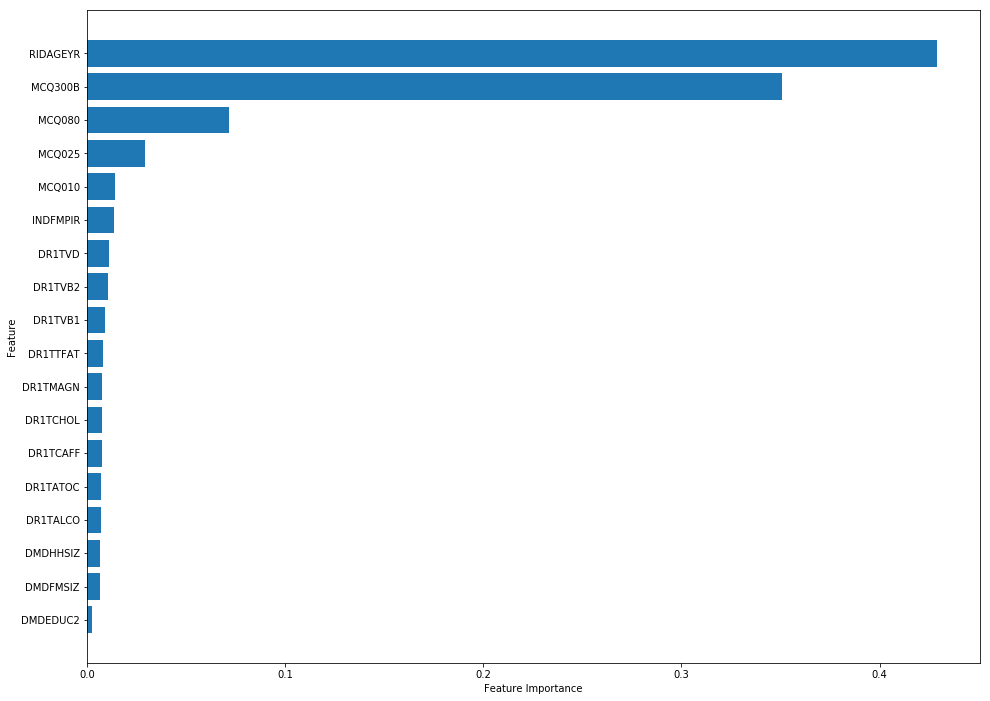

In [138]:
all_in_one_scorer(forest, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1637
           1       0.58      1.00      0.74       151

    accuracy                           0.94      1788
   macro avg       0.79      0.97      0.85      1788
weighted avg       0.96      0.94      0.95      1788

0.9395973154362416


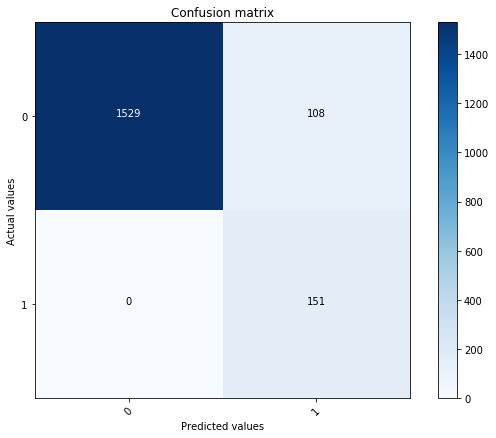

In [140]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = lr_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0, 1])
plt.show()

### SVC

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1637
           1       0.58      1.00      0.74       151

    accuracy                           0.94      1788
   macro avg       0.79      0.97      0.85      1788
weighted avg       0.96      0.94      0.95      1788

0.9395973154362416


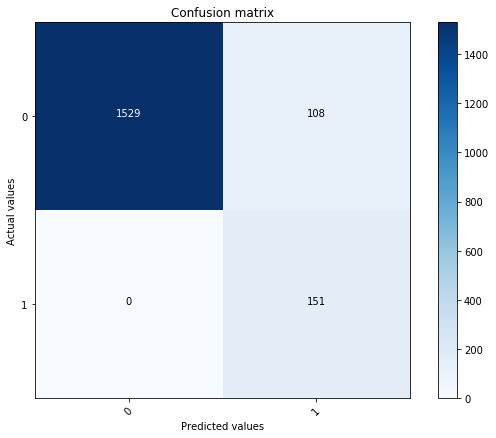

In [122]:
svc_clf = SVC()
svc_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = svc_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1])
plt.show()

## Finetuning parameters

### Random Forest

In [64]:
param_grid = {
    "n_estimators": [90, 100],
    'max_depth': [1,5,20],
}

In [74]:
forest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='precision', cv=None, n_jobs=1)
forest_grid_search.fit(X_train_scaled_smoted, y_train_smoted)

best_parameters = forest_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
max_depth: 20
n_estimators: 100


In [75]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 20)
forest.fit(X_train_scaled_smoted, y_train_smoted)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_pred = forest.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

AUC (pred_proba):  0.9734209323305838


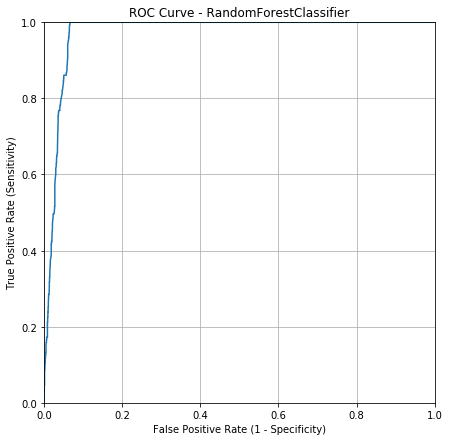

In [78]:
# testing

# plot_roc_curve(y_test, y_pred)

ROC_func(forest, X_test_scaled, y_test)

Model Scores for:  

 ----> RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Train Accuracy score:  0.9984641376132698
Test Accuracy score:  0.9407158836689038 

Train F1 score:  0.9984664928691919
Test F1 score:  0.6558441558441558 

Testing Precision Score:  0.643312101910828
Testing Recall Score:  0.6688741721854304
Test AUC score:  0.8173326267158063 

Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1637
           1       0.64      0.67      0.66       151

    accur

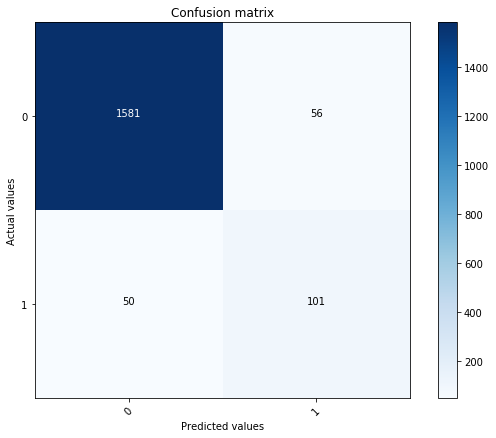

AUC (pred_proba):  0.9734209323305838


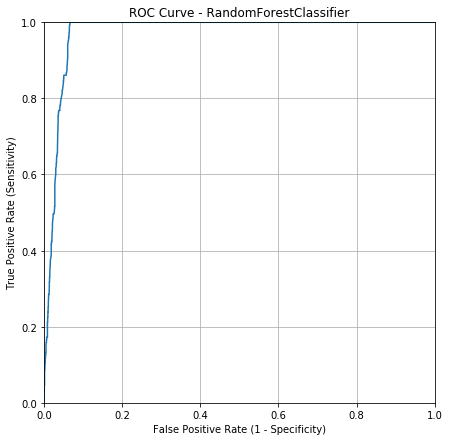

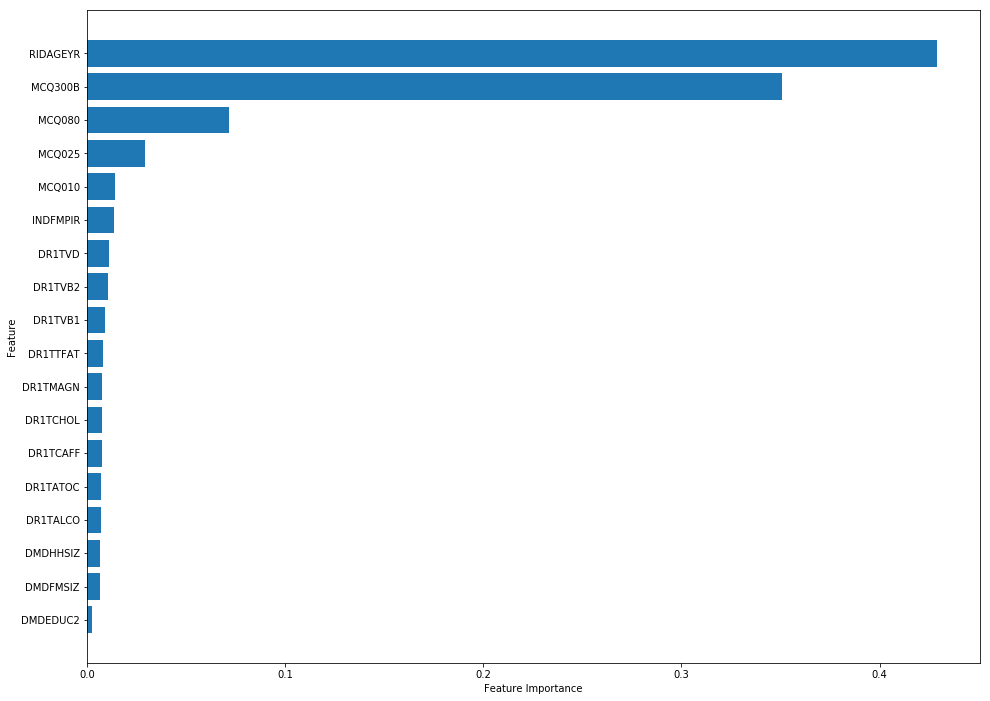

In [92]:
all_in_one_scorer(forest, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

## Ada Boost 

In [94]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [1.0, 0.5, 0.1]
}

In [95]:
adaboost_grid_search = GridSearchCV(AdaBoostClassifier(), adaboost_param_grid, scoring='precision', cv=3)
adaboost_grid_search.fit(X_train_scaled_smoted, y_train_smoted)

best_parameters = adaboost_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 1.0
n_estimators: 250


In [96]:
adaboost_clf = AdaBoostClassifier(n_estimators=250, learning_rate= 1.0)
adaboost_clf.fit(X_train_scaled_smoted, y_train_smoted)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=250, random_state=None)

In [97]:
y_pred = adaboost_clf.predict(X_test_scaled)

Model Scores for:  

 ----> AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=250, random_state=None) 

Train Accuracy score:  0.979265857779143
Test Accuracy score:  0.9395973154362416 

Train F1 score:  0.9795578437310721
Test F1 score:  0.660377358490566 

Testing Precision Score:  0.6287425149700598
Testing Recall Score:  0.695364238410596
Test AUC score:  0.8287450391808631 

Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1637
           1       0.63      0.70      0.66       151

    accuracy                           0.94      1788
   macro avg       0.80      0.83      0.81      1788
weighted avg       0.94      0.94      0.94      1788
 



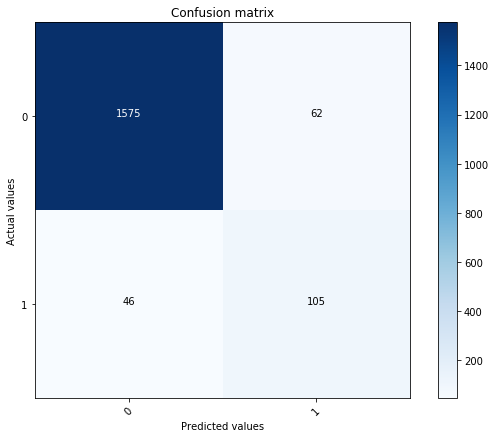

AUC (pred_proba):  0.9740500107206285


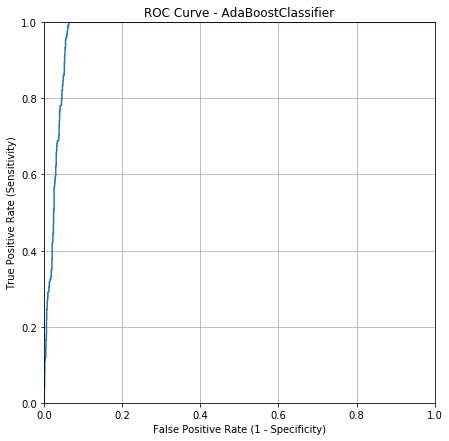

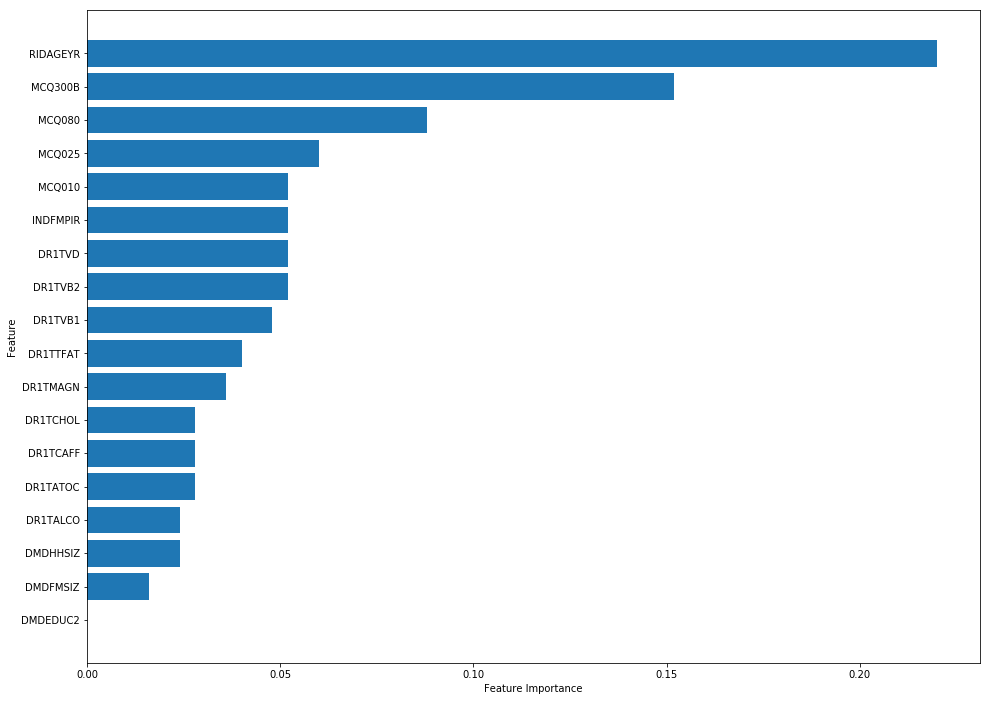

In [99]:
all_in_one_scorer(adaboost_clf, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

## XGBoost 

In [100]:
xgboost_param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [101]:
clf = xgb.XGBClassifier()
xgboost_grid_search = GridSearchCV(xgb.XGBClassifier(), xgboost_param_grid, scoring='precision', cv=3)
xgboost_grid_search.fit(np.array(X_train_scaled_smoted), np.array(y_train_smoted))

best_parameters = xgboost_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 250
subsample: 0.7


In [102]:
xgboost_clf = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 6, min_child_weight= 10, 
                                n_estimators= 250, subsample= 0.7)
xgboost_clf.fit(np.array(X_train_scaled_smoted), np.array(y_train_smoted))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [103]:
y_pred = xgboost_clf.predict(np.array(X_test_scaled))

Model Scores for:  

 ----> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1) 

Train Accuracy score:  0.9939333435724159
Test Accuracy score:  0.9373601789709173 

Train F1 score:  0.9939625525410777
Test F1 score:  0.6083916083916083 

Testing Precision Score:  0.6444444444444445
Testing Recall Score:  0.5761589403973509
Test AUC score:  0.7734185050184679 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1637
           1       0.64      0.58      0.61       151

    accuracy            

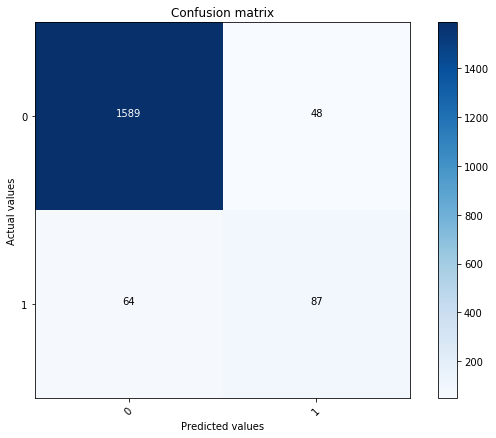

AUC (pred_proba):  0.9738861671528033


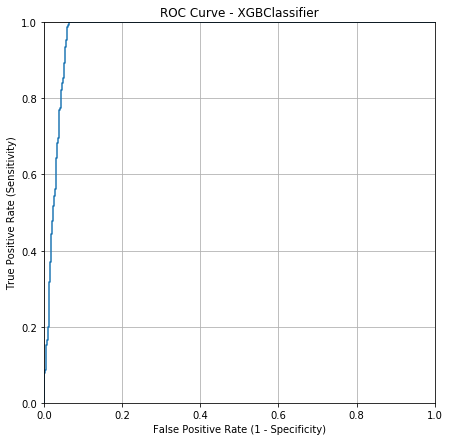

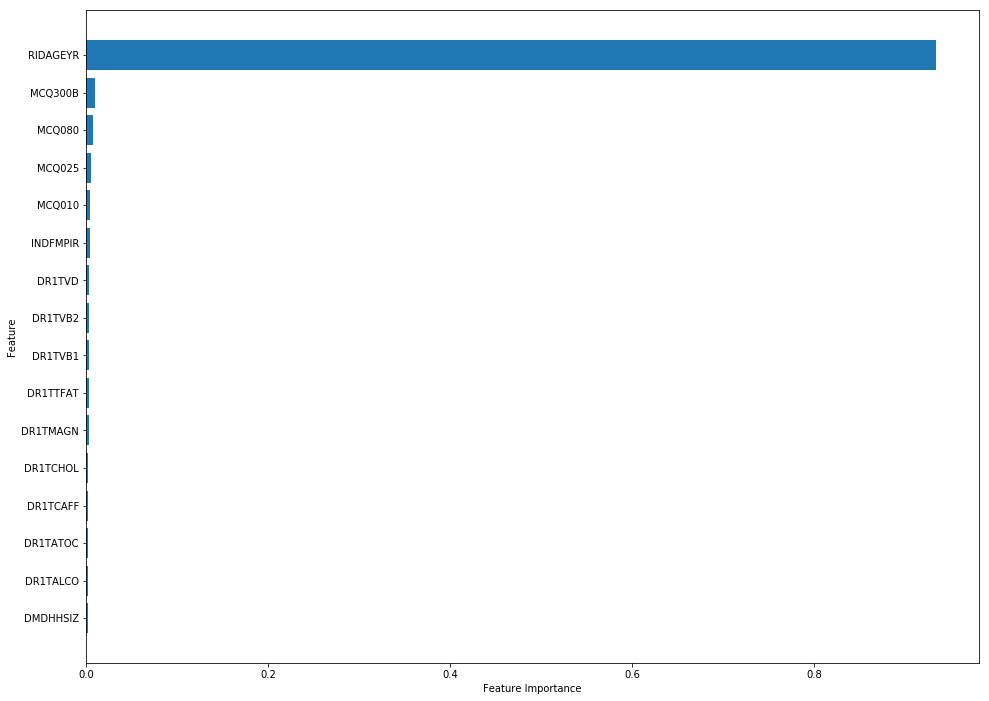

In [112]:
xgb_all_in_one_scorer(xgboost_clf, np.array(X_train_scaled_smoted), np.array(X_test_scaled), 
                      y_train_smoted, y_test, y_pred, X_train_scaled_smoted)


## Naive Bayes

In [141]:
bayes_clf = MultinomialNB()
bayes_clf.fit(X_train_scaled_smoted, y_train_smoted)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
bayes_clf.score(X_test_scaled, y_test)

0.9395973154362416

In [143]:
bayes_clf.score(X_train_scaled_smoted, y_train_smoted)

0.9698203041007526

Model Scores for:  

 ----> MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Train Accuracy score:  0.9698203041007526
Test Accuracy score:  0.9395973154362416 

Train F1 score:  0.9707044353335819
Test F1 score:  0.7365853658536585 

Testing Precision Score:  0.583011583011583
Testing Recall Score:  1.0
Test AUC score:  0.9670128283445326 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      0.93      0.97      1637
           1       0.58      1.00      0.74       151

    accuracy                           0.94      1788
   macro avg       0.79      0.97      0.85      1788
weighted avg       0.96      0.94      0.95      1788
 



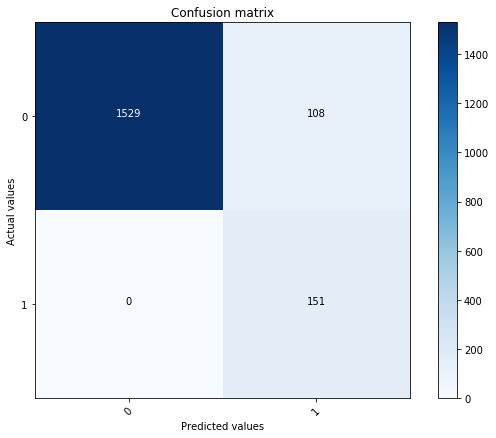

AUC (pred_proba):  0.9707751621242219


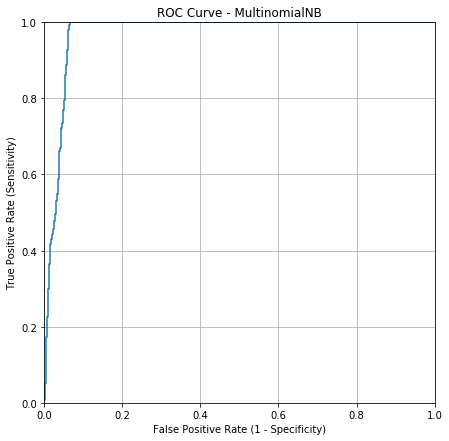

In [144]:
bayes_all_in_one_scorer(bayes_clf, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

### Logistic Regression

In [119]:
param_grid = {'penalty': ['l1', 'l2'], 
             'C': np.logspace(0, 4, 10)}

In [124]:
clf_grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, iid=False)
best_model = clf_grid_search.fit(X_train_scaled_smoted, y_train_smoted)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 10000.0


Model Scores for:  

 ----> LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Train Accuracy score:  0.9702810628167716
Test Accuracy score:  0.9435123042505593 

Train F1 score:  0.9711387873816094
Test F1 score:  0.7481296758104738 

Testing Precision Score:  0.6
Testing Recall Score:  0.9933774834437086
Test AUC score:  0.9661450642630883 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1637
           1       0.60      0.99      0.75       151

    accuracy                           0.94      1788
   macro avg       0.80      0.97      0.86      1788
weighted avg       0.97      0.94      0.95      1788
 



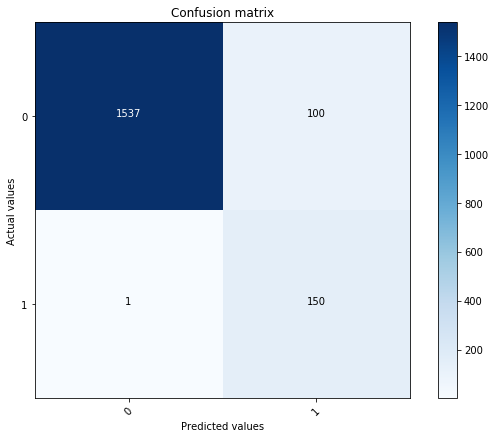

AUC (pred_proba):  0.9790239777981852


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

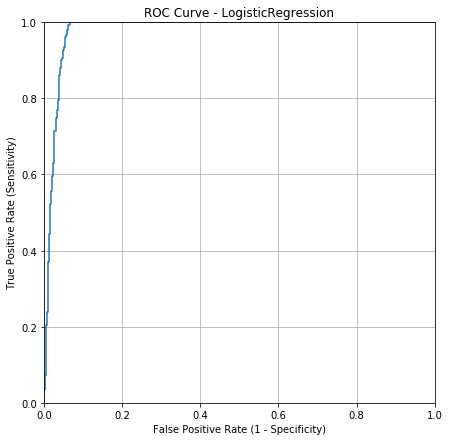

In [126]:
lr_clf = best_model
lr_clf = LogisticRegression(C=10000, penalty='l2')
lr_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = lr_clf.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
# eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
# plt.show()
all_in_one_scorer(lr_clf, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

### SVC

In [145]:
param_grid = [
  {'C': [1, 10, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 500, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [146]:
from sklearn.model_selection import GridSearchCV

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [147]:
# run grid search
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 1, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 10, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 100, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 500, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 1000, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.970 (std: 0.002)
Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Model wit

Model Scores for:  

 ----> SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

Train Accuracy score:  0.9698203041007526
Test Accuracy score:  0.9395973154362416 

Train F1 score:  0.9707044353335819
Test F1 score:  0.7365853658536585 

Testing Precision Score:  0.583011583011583
Testing Recall Score:  1.0
Test AUC score:  0.9670128283445326 

Classification Report:  
               precision    recall  f1-score   support

           0       1.00      0.93      0.97      1637
           1       0.58      1.00      0.74       151

    accuracy                           0.94      1788
   macro avg       0.79      0.97      0.85      1788
weighted avg       0.96      0.94      0.95      1788
 



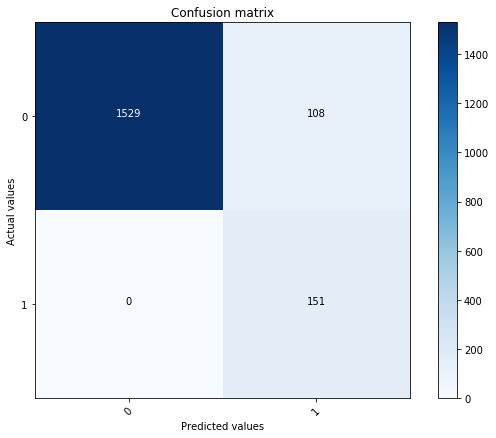

In [148]:
svc_clf = SVC(C=1,  kernel='linear')
svc_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = svc_clf.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
# eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
# plt.show()
svc_all_in_one_scorer(svc_clf, X_train_scaled_smoted, X_test_scaled, y_train_smoted, y_test, y_pred)

### Helper functions

In [80]:
def all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    
#     plot_confusion_matrix(y_test, y_pred, classes=set('y_test'))
    plot_confusion_matrix(y_test, y_pred, [0, 1])

    ROC_func(clf, X_test, y_test)
    plot_feature_importance(clf, X_train)
    
    return #clf

In [133]:
def svc_all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    
#     plot_confusion_matrix(y_test, y_pred, classes=set('y_test'))
    plot_confusion_matrix(y_test, y_pred, [0, 1])

#     ROC_func(clf, X_test, y_test)
#     plot_feature_importance(clf, X_train)
    
    return #clf

In [81]:
def score_model(clf, X_train, X_test, y_train, y_test):
    
    print('Model Scores for: ', '\n\n','---->', clf, '\n')
    print('Train Accuracy score: ', accuracy_score(y_train, clf.predict(X_train)))
    print('Test Accuracy score: ', accuracy_score(y_test, clf.predict(X_test)),'\n')
    print('Train F1 score: ', f1_score(y_train, clf.predict(X_train)))
    print('Test F1 score: ', f1_score(y_test, clf.predict(X_test)), '\n')
    print("Testing Precision Score: ", precision_score(y_test, clf.predict(X_test)))
    print("Testing Recall Score: ", recall_score(y_test, clf.predict(X_test)))
    print('Test AUC score: ', roc_auc_score(y_test, clf.predict(X_test)), '\n')
    print('Classification Report: ', '\n', classification_report(y_test, clf.predict(X_test)), '\n')
    
    return #clf

In [82]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#     #Add Normalization Option
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')
    plt.show()

In [83]:
def ROC_func(clf, X_test, y_test):
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'ROC Curve - {clf.__class__.__name__}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

    print('AUC (pred_proba): ', roc_auc_score(y_test, y_pred_prob))

In [84]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [85]:
def plot_feature_importance(model, x_train, n=20):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

In [111]:
def xgb_all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred, data):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, [0, 1])
    ROC_func(clf, X_test, y_test)
    xgb_plot_feature_importance(clf, X_train, data)
    
    return #clf

In [109]:
def bayes_all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, [0, 1])
    ROC_func(clf, X_test, y_test)
    
    return #clf

In [107]:
def xgb_plot_feature_importance(model, x_train, data, n=16):
    # extract and sort the feature importance
    features = model.feature_importances_
#     df_xgb = data.drop('is_spam', axis =1)
    feature_names = data.columns.values
    

    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

In [91]:
# from sklearn
def plot_roc_curve(y_test, y_pred, figname='roc_curve'):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred, pos_label={1,2})
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Plot of a ROC curve for a specific class
    plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(figname, dpi=300)
    plt.show()